# 📇 Fraction

In [107]:
#Let's import library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [108]:
#Let's import dataset
path = 'week9_predictive_maintenance.csv'
df = pd.read_csv(path)

In [109]:
#Let's select only int and float types columns
df = df.select_dtypes(['int','float'])
df

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,298.1,308.6,1551,42.8,0,0
1,2,298.2,308.7,1408,46.3,3,0
2,3,298.1,308.5,1498,49.4,5,0
3,4,298.2,308.6,1433,39.5,7,0
4,5,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0
9996,9997,298.9,308.4,1632,31.8,17,0
9997,9998,299.0,308.6,1645,33.4,22,0
9998,9999,299.0,308.7,1408,48.5,25,0


In [110]:
#Let's look at number of values of target column
df.Target.value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [111]:
#Let's look at ratio of values
print("Ratio of 0: " , len(df[df['Target'] == 0])/len(df))
print("Ratio of 1: " , len(df[df['Target'] == 1])/len(df))

Ratio of 0:  0.9661
Ratio of 1:  0.0339


In [112]:
#Let's create random forest model
rfc = RandomForestClassifier(max_depth = 5 , random_state = 42)

In [113]:
#Let's divide data to train and test
count = len(df)*0.8
train = df.loc[:count]
test = df.loc[count:]

In [116]:
#Let's balance the train dataset 
frac = 0.2
train_0 = train[train['Target'] == 0].sample(frac = frac)
train_1 = train[train['Target'] == 1]
train = pd.concat([train_0,train_1])

In [117]:
#Let's select target and explanatory variables 
y_train = train['Target']
x_train = train.drop(columns = 'Target')

In [118]:
#Let's fit its
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [119]:
#Let's predict new values 
y_test = test['Target']
x_test = test.drop(columns = 'Target')
y_pred = rfc.predict(x_test)

In [120]:
#Let's look at f score accuracy score 
print(f"Fraction: {frac}  |  F-Score(Test): {f1_score(y_test,y_pred)}  |  Accuracy Score(Test): {accuracy_score(y_test,y_pred)}")

Fraction: 0.2  |  F-Score(Test): 0.5428571428571428  |  Accuracy Score(Test): 0.984


# 🗞️ Fraction (For loop)

In [132]:
#Let's import dataset
#Let's select only int and float types columns
path = 'week9_predictive_maintenance.csv'
df = pd.read_csv(path)

In [133]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [134]:
df = df.select_dtypes(['int','float'])

In [135]:
#Let's divide data to train and test
train = df.loc[:count]
test = df.loc[count:]

In [136]:
df

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,298.1,308.6,1551,42.8,0,0
1,2,298.2,308.7,1408,46.3,3,0
2,3,298.1,308.5,1498,49.4,5,0
3,4,298.2,308.6,1433,39.5,7,0
4,5,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0
9996,9997,298.9,308.4,1632,31.8,17,0
9997,9998,299.0,308.6,1645,33.4,22,0
9998,9999,299.0,308.7,1408,48.5,25,0


In [137]:
#Let's look at different f score in various fraction
for frac in np.arange(1,10)/10:
    train_0 = train[train['Target'] == 0].sample(frac = frac)
    train_1 = train[train['Target'] == 1]
    train_01 = pd.concat([train_0,train_1])
    y_train = train_01['Target']
    x_train = train_01.drop(columns =  ['Target'])
    y_test = test['Target']
    x_test = test.drop(columns = ['Target'])
    rfc.fit(x_train,y_train)
    y_pred_test = rfc.predict(x_test)
    print(f"Fraction: {frac} | F Score: {f1_score(y_test,y_pred_test)}")

Fraction: 0.1 | F Score: 0.5225225225225226
Fraction: 0.2 | F Score: 0.5217391304347827
Fraction: 0.3 | F Score: 0.5970149253731343
Fraction: 0.4 | F Score: 0.5084745762711865
Fraction: 0.5 | F Score: 0.5
Fraction: 0.6 | F Score: 0.48148148148148145
Fraction: 0.7 | F Score: 0.45283018867924535
Fraction: 0.8 | F Score: 0.45283018867924535
Fraction: 0.9 | F Score: 0.45283018867924535


# 📥 Dynamic 📤

In [366]:
#Let's import dataset
#Let's select only int and float types columns
path = 'week9_predictive_maintenance.csv'
df = pd.read_csv(path)
df = df.select_dtypes(['int','float'])

In [367]:
#Let's divide data to train and test
train = df.loc[:count]
test = df.loc[count:]

In [368]:
#Let's write as dynamic
#We select max_depth and test&train size then we enter train and test to this function
#This function finds the best f-score and the fractional number corresponding to the maximum f-score
rfc = RandomForestClassifier(max_depth = 5,random_state = 42)
def find_frac(train,test):
    best_fscore = 0
    best_frac = 0
    for i in np.arange(1,10)/10:
        if len(train[train['Target'] == 0]) > len(train[train['Target'] == 1]):
            train_0 = train[train['Target'] == 0].sample(frac = i)
            train_1 = train[train['Target'] == 1]
            train_01 = pd.concat([train_0,train_1])
            train_01 = train_01.sample(frac = 1.0)
            y_train = train_01['Target']
            x_train = train_01.drop(columns =  ['Target'])
            y_test = test['Target']
            x_test = test.drop(columns = ['Target'])
            rfc.fit(x_train,y_train)
            y_pred_test = rfc.predict(x_test)
            f_score = f1_score(y_test,y_pred_test)
            if f_score > best_fscore:
                best_fscore = f_score
                best_frac = i
        else:
            train_1 = train[train['Target'] == 1].sample(frac = i)
            train_0 = train[train['Target'] == 0]
            train_01 = pd.concat([train_0,train_1])
            train_01 = train_01.sample(frac = 1.0)
            y_train = train_01['Target']
            x_train = train_01.drop(columns =  ['Target'])
            y_test = test['Target']
            x_test = test.drop(columns = ['Target'])
            rfc.fit(x_train,y_train)
            y_pred_test = rfc.predict(x_test)
            f_score = f1_score(y_test,y_pred_test)
            if f_score > best_fscore:
                best_fscore = f_score
                best_frac = i
    return f"The best fraction: {best_frac} |  The Best F-Score: {best_fscore}"

In [369]:
print(find_frac(train,test))

The best fraction: 0.2 |  The Best F-Score: 0.5714285714285715


# 📝 Multi Class

In [138]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

train = pd.read_csv("week9_music_train.csv")
train = train.fillna(0)

del train['Artist Name']
del train['Track Name']

classnames = {
    0:'Rock',
    1:'Indie',
    2:'Alt',
    3:'Pop',
    4:'Metal',
    5:'HipHop',
    6:'Alt',
    7:'Blues',
    8:'Acoustic_Folk',
    9:'Instrumental',
    10:'Country',
    11:'Indie'
}

train['Class'] = train['Class'].map(classnames)

train

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.000000,0.0849,0.8990,134.071,234596.0,4,HipHop
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Country
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,Alt
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.000000,0.1220,0.5690,107.033,173968.0,4,HipHop
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,Alt
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,Alt
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,Acoustic_Folk
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,Acoustic_Folk


In [6]:
train['Class'].value_counts()

Country          4949
Alt              3859
Instrumental     2524
Acoustic_Folk    1854
HipHop           1447
Indie            1373
Rock              625
Blues             576
Pop               402
Metal             387
Name: Class, dtype: int64

In [7]:
#Let's write as dynamic
#We select max_depth and test&train size then we enter train and test to this function
#This function finds the best f-score and the fractional number corresponding to the maximum f-score
def find_frac_multiple_choice(train): 
    best_fscore = 0
    best_frac = 0
    for cls in list(train['Class'].unique()):
        for frac in np.arange(1,11)/10:
            copied = train.copy()
            copied[ 'Class' ] = copied[ 'Class' ].apply(lambda value: 1 if value == cls else 0)

            limit = int(len(copied) * 0.70)
            tr = copied[:limit]
            te = copied[limit:]

            tr0 = tr[ tr['Class'] == 0 ].sample(frac = frac)
            tr1 = tr[ tr['Class'] == 1 ]

            tr = pd.concat([tr0, tr1])
            tr = tr.sample(frac = 1.0)

            clf = RandomForestClassifier(max_depth=5, random_state=0)

            y_train = tr['Class']
            x_train = tr.drop(columns = 'Class')

            clf.fit(x_train,y_train)

            y_test = te['Class']
            x_test = te.drop(columns = 'Class')
            fscore = f1_score(y_test, clf.predict(x_test)) 
            if fscore > best_fscore:
                best_fscore = fscore
                best_frac = frac
        print(f"The name of class: {cls} |  The best fraction: {best_frac} |  The Best F-Score: {best_fscore}")

In [385]:
find_frac_multiple_choice(train)

The name of class: HipHop |  The best fraction: 0.3 |  The Best F-Score: 0.7099143206854345
The name of class: Country |  The best fraction: 0.3 |  The Best F-Score: 0.7099143206854345
The name of class: Alt |  The best fraction: 0.3 |  The Best F-Score: 0.7099143206854345
The name of class: Metal |  The best fraction: 0.3 |  The Best F-Score: 0.7099143206854345
The name of class: Acoustic_Folk |  The best fraction: 0.3 |  The Best F-Score: 0.7099143206854345
The name of class: Instrumental |  The best fraction: 0.3 |  The Best F-Score: 0.7099143206854345
The name of class: Pop |  The best fraction: 0.2 |  The Best F-Score: 0.7341772151898734
The name of class: Blues |  The best fraction: 0.4 |  The Best F-Score: 0.9226666666666666
The name of class: Indie |  The best fraction: 0.4 |  The Best F-Score: 0.9226666666666666
The name of class: Rock |  The best fraction: 0.4 |  The Best F-Score: 0.9226666666666666


# 💡 Artist Column

In [242]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns

train = pd.read_csv("week9_music_train.csv")

In [243]:
sum(train['Artist Name'].value_counts() > 40)

5

In [244]:
train['Artist Name'].nunique()

9149

In [245]:
counts = train['Artist Name'].value_counts() > 40
top5 = []
for i in range(len(counts)):
    if counts[i] == True: 
        top5.append(counts.index[i])

In [246]:
train.loc[~train['Artist Name'].isin(top5), 'Artist Name'] = 'Others'

In [247]:
train['Artist Name'].value_counts()

Others             17717
Backstreet Boys       69
Westlife              60
Britney Spears        54
Eyal Golan            48
Omer Adam             48
Name: Artist Name, dtype: int64

In [248]:
train = pd.get_dummies(train , columns = ['Artist Name'])

In [249]:
train.corr()['Class']

C:\Users\HP\AppData\Local\Temp\ipykernel_15320\707980231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['Class']


Popularity                     0.161072
danceability                  -0.097681
energy                         0.217328
key                           -0.007829
loudness                       0.177872
mode                          -0.044740
speechiness                   -0.059349
acousticness                  -0.237138
instrumentalness              -0.025343
liveness                       0.045309
valence                       -0.075116
tempo                          0.031737
duration_in min/ms             0.203678
time_signature                 0.047989
Class                          1.000000
Artist Name_Backstreet Boys    0.044589
Artist Name_Britney Spears     0.039429
Artist Name_Eyal Golan         0.037168
Artist Name_Omer Adam          0.037168
Artist Name_Others            -0.090191
Artist Name_Westlife           0.041569
Name: Class, dtype: float64

In [250]:
del train['Track Name']

In [251]:
columns = train.columns

In [252]:
columns

Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class',
       'Artist Name_Backstreet Boys', 'Artist Name_Britney Spears',
       'Artist Name_Eyal Golan', 'Artist Name_Omer Adam', 'Artist Name_Others',
       'Artist Name_Westlife'],
      dtype='object')

In [253]:
corr_col = {}
for column1 in columns:
    for column2 in columns:
         if column1 != column2 and column1 != 'Class' and column2 != 'Class':
            col = f"{column1} + {column2}"
            train[col] = train[column1] + train[column2]
            corr = train['Class'].corr(train[col])
            if corr < 0.25 and corr > -0.25:
                del train[col]
            else: 
                corr_col[col] = corr

In [254]:
corr_col

{'danceability + acousticness': -0.2542124833269818,
 'acousticness + danceability': -0.2542124833269818,
 'acousticness + Artist Name_Others': -0.25457811678385417,
 'Artist Name_Others + acousticness': -0.25457811678385417}

<Axes: >

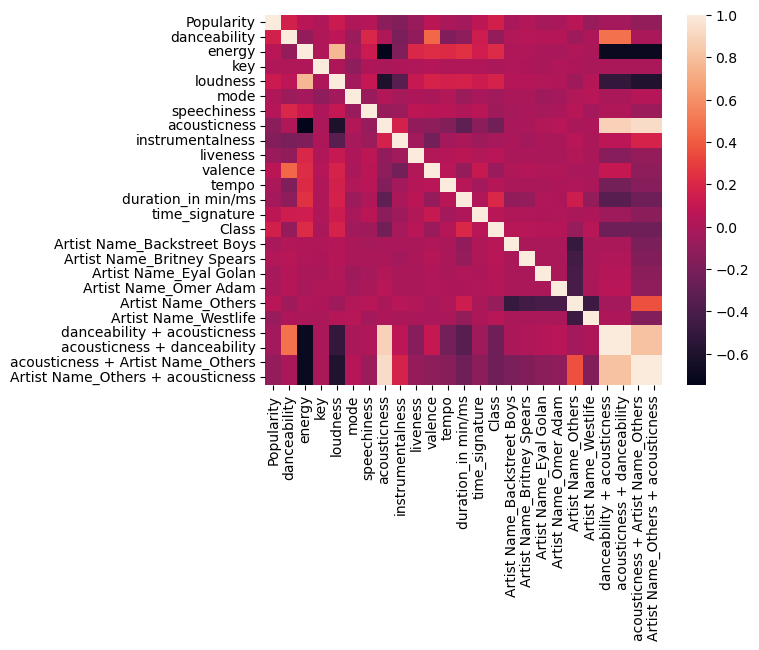

In [255]:
sns.heatmap(train.corr())

In [256]:
train.fillna(0 , inplace = True )

In [257]:
classnames = {
    0:'Rock',
    1:'Indie',
    2:'Alt',
    3:'Pop',
    4:'Metal',
    5:'HipHop',
    6:'Alt',
    7:'Blues',
    8:'Acoustic_Folk',
    9:'Instrumental',
    10:'Country',
    11:'Indie'
}

train['Class'] = train['Class'].map(classnames)

In [263]:
#Let's write as dynamic
#We select max_depth and test&train size then we enter train and test to this function
#This function finds the best f-score and the fractional number corresponding to the maximum f-score
def find_frac_multiple_choice(train): 
    best_fscore = 0
    best_frac = 0
    for cls in list(train['Class'].unique()):
        for frac in np.arange(1,11)/10:
            copied = train.copy()
            copied[ 'Class' ] = copied[ 'Class' ].apply(lambda value: 1 if value == cls else 0)

            limit = int(len(copied) * 0.70)
            tr = copied[:limit]
            te = copied[limit:]

            tr0 = tr[ tr['Class'] == 0 ].sample(frac = frac)
            tr1 = tr[ tr['Class'] == 1 ]

            tr = pd.concat([tr0, tr1])
            tr = tr.sample(frac = 1.0)

            clf = RandomForestClassifier(max_depth=5, random_state=0)

            y_train = tr['Class']
            x_train = tr.drop(columns = 'Class')

            clf.fit(x_train,y_train)

            y_test = te['Class']
            x_test = te.drop(columns = 'Class')
            fscore = f1_score(y_test, clf.predict(x_test)) 
            if fscore > best_fscore:
                best_fscore = fscore
                best_frac = frac
        print(f"The name of class: {cls} |  The best fraction: {best_frac} |  The Best F-Score: {best_fscore}")

In [264]:
find_frac_multiple_choice(train)

The name of class: HipHop |  The best fraction: 0.3 |  The Best F-Score: 0.6811070998796631
The name of class: Country |  The best fraction: 0.3 |  The Best F-Score: 0.6811070998796631
The name of class: Alt |  The best fraction: 0.3 |  The Best F-Score: 0.6811070998796631
The name of class: Metal |  The best fraction: 0.3 |  The Best F-Score: 0.6811070998796631
The name of class: Acoustic_Folk |  The best fraction: 0.3 |  The Best F-Score: 0.6811070998796631
The name of class: Instrumental |  The best fraction: 0.3 |  The Best F-Score: 0.6811070998796631
The name of class: Pop |  The best fraction: 0.3 |  The Best F-Score: 0.7155963302752294
The name of class: Blues |  The best fraction: 0.3 |  The Best F-Score: 0.8936170212765957
The name of class: Indie |  The best fraction: 0.3 |  The Best F-Score: 0.8936170212765957
The name of class: Rock |  The best fraction: 0.3 |  The Best F-Score: 0.8936170212765957


# ✔ The End